# Data Challenge

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
%matplotlib inline


In [2]:
def print_full(x):
    pd.set_option('display.max_rows',len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [3]:
#read data
data_loc = 'D:\\blend'
 
df = pd.read_csv(data_loc +'\\'+ 'LoanStats3d.csv')

C:\Users\Chao Cheng\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68615169,73517949,16000,16000,16000.0,60 months,8.49%,328.19,B,B1,...,0,3,87.5,50.0,0,0,307343,64371,23500,59526
1,68537564,73427399,8000,8000,8000.0,36 months,10.78%,261.08,B,B4,...,0,4,97.1,100.0,0,0,168819,148154,5800,136996
2,68536799,73426617,10000,10000,10000.0,36 months,10.78%,326.35,B,B4,...,0,2,100.0,33.3,0,0,190694,40681,13900,29512
3,68355089,73244858,24700,24700,24700.0,36 months,11.99%,820.28,C,C1,...,0,2,97.4,7.7,0,0,314017,39475,79300,24667
4,68506885,73396712,10000,10000,10000.0,60 months,11.99%,222.40,C,C1,...,0,1,100.0,50.0,0,0,61054,41166,13100,46854


In [5]:
for i in df.columns:
    print i

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc

## 1. Is Lending Club making money with the loans in the dataset?

### Lending Club business model:
#### Revenue = Origination Fee  + Service Fee 
["Lending Club makes money through origination and service fees. Borrowers pay a one-time origination fee of 1.11% to 5% of the total loan amount, depending on the loan grade and term. Meanwhile, investors pay a service fee of 1% of each payment received from a borrower."](http://vator.tv/news/2014-03-21-how-does-lending-club-make-money#yss2rMyUWuVUhgqZ.99)

[origination fee rate](http://www.lendingmemo.com/rates-fees-lending-club-prosper/)


#### As long as Lending club would attract personal investor and borrower to get the loan funded, they're making money


#### For this dataset, it does not contain any cost for lending club. Thus "making money" would only consider the revenue stream, without operating expense or capital expense. The profit or profitability in the following questions would also refer to only revenue.


In [6]:
# dataframe size
df.shape

(421095, 111)

In [7]:
#unique loans
len(df['id'].unique())

421095

In [8]:
#check if any loan amount not equals to funded amount, check if loan fully funded or not
len(df[df['loan_amnt']<> df['funded_amnt']])

0

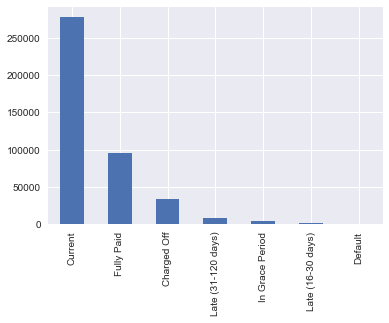

In [9]:
#check loan status
# loan_status = pd.Series(df['loan_status']).value_counts()
# loan_status
df.loan_status.value_counts().plot(kind='bar')


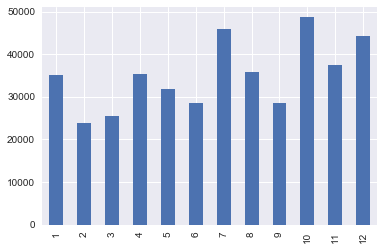

In [10]:
#check when all the loans were issued
df['mth']=df['issue_d'].apply(lambda x: x.strip()[:3])
def convertmonth(df):
    if df['mth'] =='Jan':
        return 1
    elif df['mth'] =='Feb':
        return 2
    elif df['mth'] =='Mar':
        return 3
    elif df['mth'] =='Apr':
        return 4
    elif df['mth'] =='May':
        return 5
    elif df['mth'] =='Jun':
        return 6
    elif df['mth'] =='Jul':
        return 7
    elif df['mth'] =='Aug':
        return 8
    elif df['mth'] =='Sep':
        return 9
    elif df['mth'] =='Oct':
        return 10
    elif df['mth'] =='Nov':
        return 11
    else:
        return 12
df['month'] = df.apply(convertmonth,axis=1) 
del df['mth']
df.month.value_counts().sort_index().plot(kind='bar')

#### All of the loans in the dataset are unique and issued (fully funded). 
[lending club loan status](https://help.lendingclub.com/hc/en-us/articles/215488038-What-do-the-different-Note-statuses-mean-)


#### Lending Club is making money.  All the loans are fully funded, which means Lending Club has collected origination fee for all these loans. Lending Club has collect some service fees, which is based on payment, as long as the loan was not charged off immediately after it was issued.
##### Question becomes how much money they're making based on this dataset?

Let's assume it is Jan 2016 to look at the data, which provides a snap shot of all the loan status in the end of 2015. Otherwise, we would not be able to know the loan status now and calculate how much money is made by Lending Club.

For origination fee, it is collected when the loan is issued to the borrower. Thus all the loan in this data set should have already been collected the origination fee. 
[origination fee rate](http://www.lendingmemo.com/rates-fees-lending-club-prosper/)
<img src="http://www.lendingmemo.com/wp-content/uploads/2014/04/Lending-Club-Origination-Fee.png" alt="Drawing" style="width: 500px;" align= "top"/>

eg: loan_amnt = 10,000; Grade = A; Sub-grade = 1; term = 36 months
then org_fee = 10,000 * 1.11% = 111
Because the origination fee is a one time fee, and the loan term could either be 36 month or 60 month, a good metric to spread the org_fee through out the term could provide a good comparison of revenue on different terms. 

For service fee/payment service fee, a flat rate of 1% is applied. We could only get service fee from loan with a status of "current". Any loan that is "Paid Fully" or other late or charged off status would not be able to get service fee. To calculate all the service fee, we could use total_pymnt (Payments received to date for total amount funded) to calculate the service fee have been collected so far.

eg: loan_amnt =10,000; int_rate = 10.78%; term= 36 months; installment = 326.35 ; total_pymnt = 4227.58;
then service_fee = 4227.58 * 1% = 42.28

## 2. Could you find out what slices of the loans are making the most money? Who or/and what loan segments you think we should focus on?

In [11]:
#define a term_n to convert term into a numeric value
df['term_n']=pd.to_numeric(df['term'].apply(lambda x: x.strip()[:2]))

In [12]:
df['sub_grade'].value_counts()

C1    26434
C2    25496
B4    25121
C3    24844
C4    24752
B3    24637
B5    23581
A5    23059
B2    22171
B1    22096
C5    19041
D1    16977
A4    15486
D2    12757
A1    12373
D3    11638
A2    11529
D4    11459
A3    10889
D5     9823
E1     9235
E2     8335
E3     7158
E4     5732
E5     4488
F1     3278
F2     2391
F3     1725
F4     1342
F5     1081
G1      762
G2      575
G3      398
G4      241
G5      191
Name: sub_grade, dtype: int64

In [13]:
#define calorigfee function to assign origination fee rate for each loan
def calorigfee(df):
    if (df['sub_grade'] == 'A1' and int(df['term_n']) ==36):
        return 1.11
    elif ((df['sub_grade'] == 'A2' or df['sub_grade'] == 'A3') and int(df['term_n']) == 36): 
        return 2
    elif df['grade'] == 'A':
        return 3
    elif (df['grade'] == 'B' and int(df['term_n']) == 36):
        return 4
    else:
        return 5
    
df['orig_rate'] = df.apply(calorigfee, axis=1)



In [14]:
#calculate total origination fee and service up-to-date fee 
df['orig_fee']=df['orig_rate']*df['loan_amnt']/float(100)
df['orig_fee_per_mth']=df['orig_fee']/df['term_n']
df['service_fee']=df['total_pymnt']*0.01


In [ ]:
#define good loan to show status as current or fully paid 
df['good'] = [1 if x=='Current' or x=='Fully Paid' else 0 for x in df['loan_status']]

For loan in "fully paid" status, becaue it is shorter than 12month, Lending Club only charge 
"a percentage of the monthly contractual payment amount only, regardless of the borrower’s prepayment amount."
[repaid early](https://help.lendingclub.com/hc/en-us/articles/216118597-What-happens-if-a-loan-is-repaid-early-)

In [47]:

df['Current_ind']=[1 if x=='Current' else 0 for x in df['loan_status']]
df['lmth_service_fee']=df['good']*df['installment']*0.01


In [48]:
#define the very important metric, tot_fee_per_mth, which is composed of the origination fee
#per month and last month service fee if it is applicable  
df['tot_fee_per_mth']=df['lmth_service_fee']+df['orig_fee_per_mth']


In [53]:
df.lmth_service_fee.describe()

count    421095.000000
mean          3.882936
std           2.688269
min           0.000000
25%           2.026100
50%           3.462000
75%           5.422800
max          14.454600
Name: lmth_service_fee, dtype: float64

In [50]:
df.good.value_counts()

1    372495
0     48600
Name: good, dtype: int64

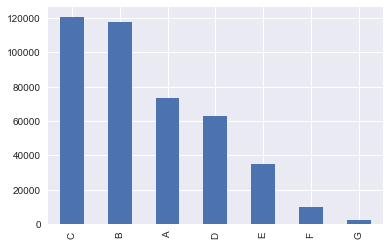

In [51]:
df.grade.value_counts().plot(kind='bar')

#### Grade B and C have most loans compared to other grades. 

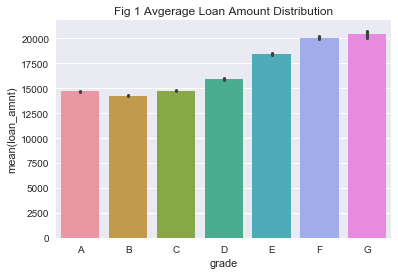

In [52]:
ax = plt.axes()
sns.barplot(x='grade', y='loan_amnt', data=df, order = ['A','B','C','D','E','F','G'])
ax.set_title('Fig 1 Avgerage Loan Amount Distribution')
plt.show()


#### From Fig 1, generally, the larger the loan, the lower the grade is. But for Grade A, B and C, there are no significant difference regarding the loan size.

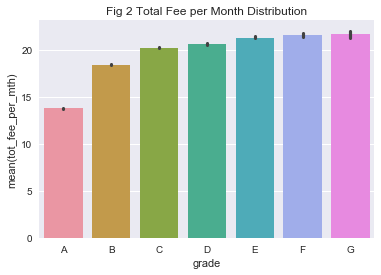

In [54]:
ax = plt.axes()
sns.barplot(x='grade', y='tot_fee_per_mth', data=df, order = ['A','B','C','D','E','F','G'])
ax.set_title('Fig 2 Total Fee per Month Distribution')
plt.show()

#### From Fig 2, as the loan grade decrease, the tot_fee_per_month increase. 

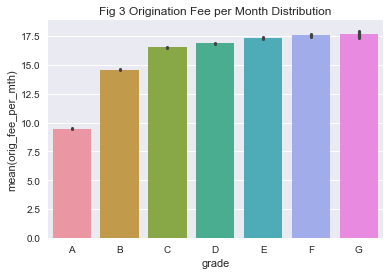

In [55]:
ax = plt.axes()
sns.barplot(x='grade', y='orig_fee_per_mth', data=df, order = ['A','B','C','D','E','F','G'])
ax.set_title('Fig 3 Origination Fee per Month Distribution')
plt.show()

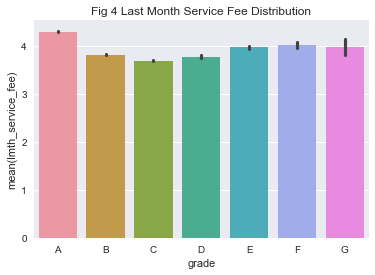

In [56]:
ax = plt.axes()
sns.barplot(x='grade', y='lmth_service_fee', data=df, order = ['A','B','C','D','E','F','G'])
ax.set_title('Fig 4 Last Month Service Fee Distribution')
plt.show()

In [31]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_il_high_credit_limit,month,term_n,orig_rate,orig_fee,orig_fee_per_mth,service_fee,good,lmth_service_fee,tot_fee_per_mth
0,68615169,73517949,16000,16000,16000.0,60 months,8.49%,328.19,B,B1,...,59526,12,60,5.0,800.0,13.333333,42.4760,1,3.2819,16.615233
1,68537564,73427399,8000,8000,8000.0,36 months,10.78%,261.08,B,B4,...,136996,12,36,4.0,320.0,8.888889,33.8206,1,2.6108,11.499689
2,68536799,73426617,10000,10000,10000.0,36 months,10.78%,326.35,B,B4,...,29512,12,36,4.0,400.0,11.111111,42.2758,1,3.2635,14.374611
3,68355089,73244858,24700,24700,24700.0,36 months,11.99%,820.28,C,C1,...,24667,12,36,5.0,1235.0,34.305556,256.7966,1,9.2635,43.569056
4,68506885,73396712,10000,10000,10000.0,60 months,11.99%,222.40,C,C1,...,46854,12,60,5.0,500.0,8.333333,28.7455,1,2.2240,10.557333


#### Comparing Fig 2,3 and 4, Grade A shows the lowest overall monthly fee. Generally, the lower the grade, the more profitable the loan is. Although grade A shows the highest monthly service fee, which may due to the lower risk, the service fee is only 1/2 to 1/5 of origination fee. As the volumns of the loan grade E, F and G are relatively small, good segments for lending club making money should be B, C and D.

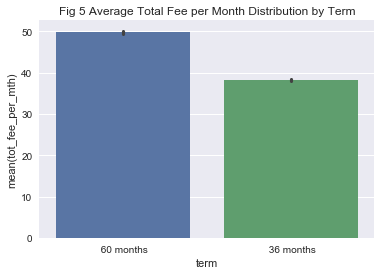

In [23]:
ax = plt.axes()
sns.barplot(x='term', y='tot_fee_per_mth', data=df)
ax.set_title('Fig 5 Average Total Fee per Month Distribution by Term')
plt.show()

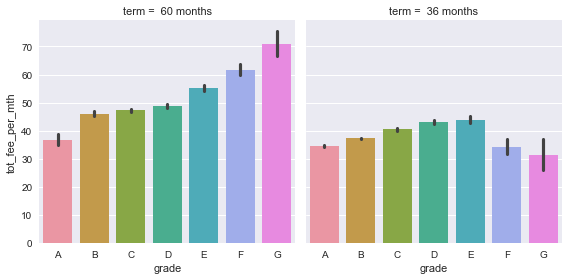

In [29]:
sns.factorplot(x='grade', y='tot_fee_per_mth', data=df, col='term', kind='bar',
               order = ['A','B','C','D','E','F','G'], col_wrap =2)


### The 60-month loan shows a better revenue compared to 36-month loan overall. However, for the 36-month loan, the lower grade F and G demonstrates a lower revenue compared to the other grades. 

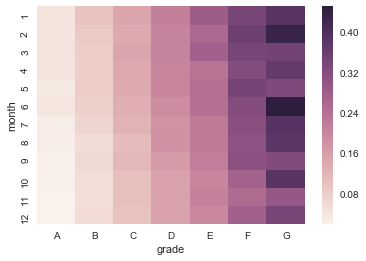

In [30]:
#Heat map y axis shows the month the loan started in 2015 
#x axis shows the loan grade
#the density shows the bad rate 
# bad rate = # of loan not in current or fully paid/# of loan in each segment
n=df[(df['loan_status']<>'Current')& (df['loan_status']<>'Fully Paid')].pivot_table(values='id',index=['month'],columns='grade',aggfunc='count')
d=df.pivot_table(values='id',index=['month'],columns='grade',aggfunc='count')
sns.heatmap(n/d)

### From the above figure, we could find as the time goes by, the "bad" rate increases, no matter what grade the loan is. With only one year data, it is very hard to tell the overall performance of the 60-month loan. As the "bad" rate may increase significantly later on. To fully evaluate the loan performance, longer period of time data is needed.

In [57]:
#take a look at the borrower income statistics
df.annual_inc.describe()

count    4.210950e+05
mean     7.696561e+04
std      7.394996e+04
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.169050e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

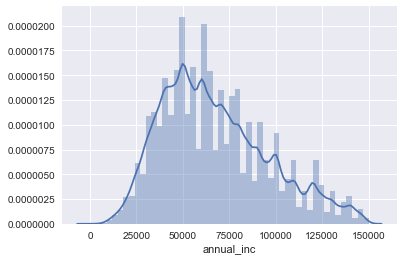

In [58]:
# borrower income distribution.
# The data has a long tail, so I put a cap at 150,000 to show the distribution.
sns.distplot(df[df.annual_inc <150000].annual_inc)

(array([   4626.,   58779.,  111552.,   96347.,   61133.,   34268.,   24258.]),
 array([     0,  20000,  40000,  60000,  80000, 100000, 120000, 140000]),
 <a list of 7 Patch objects>)

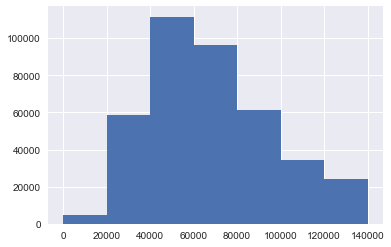

In [65]:
#bining the income to show distribution
plt.hist(df.annual_inc, bins=[0, 20000, 40000, 60000, 80000, 100000, 120000, 140000])

In [183]:
# create an ordinal variable income_level.
#the higher the level is, the more income the borrower make
df['income_level']=[6 if x> 100000 else 5 if x>80000 \
                    else 4 if x>60000 else 3 if x> 40000 \
                    else 2 if x>20000  else 1 for x in df['annual_inc'] ]

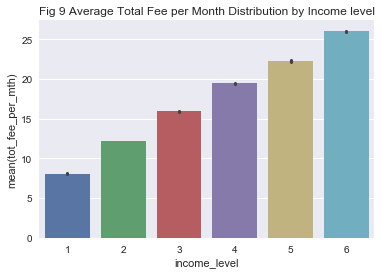

In [67]:
# Average total fee per month by borrower income level
ax = plt.axes()
sns.barplot(x='income_level', y='tot_fee_per_mth', data=df)
ax.set_title('Average Total Fee per Month Distribution by Income level')
plt.show()

#### The above shows the higher the income the borrower make, the more average total_fee_per_month lending club is making out of these people. 

In [184]:
#take a look at the loan title distribution
df.title.value_counts()

Debt consolidation                         249926
Credit card refinancing                    102056
Home improvement                            25264
Other                                       19179
Major purchase                               7434
Medical expenses                             3926
Car financing                                3475
Business                                     3357
Moving and relocation                        2422
Vacation                                     2246
Home buying                                  1440
Green loan                                    223
Simple Loan Until Contract Is Completed         1
odymeds                                         1
Prescription Drug and Medical Costs             1
SAVE                                            1
new kitchen for momma!                          1
new day                                         1
Pay off Lowes Card                              1
New Baby and New House (CC Consolidate)         1


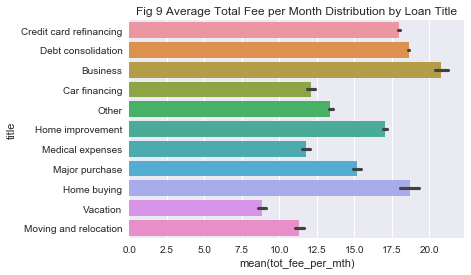

In [268]:
#remove some loan title due to low frequency
#plot average total fee per month by loan title
title_list=['Debt consolidation','Credit card refinancing','Home improvement','Other',
            'Major purchase', 'Medical expenses','Car financing','Business','Moving and relocation',
            'Vacation','Home buying']
df_title = df[df['title'].isin(title_list)]
ax = plt.axes()
sns.barplot(x='tot_fee_per_mth', y='title', data=df_title)
plt.title('Average Total Fee per Month Distribution by Loan Title')
plt.show()

#### Borrowers who would use this loan for business expansion purpose is highly profitable, while vacation is the least profitable loan.

In [185]:
#home ownership distribution
df.home_ownership.value_counts()

MORTGAGE    207683
RENT        167644
OWN          45766
ANY              2
Name: home_ownership, dtype: int64

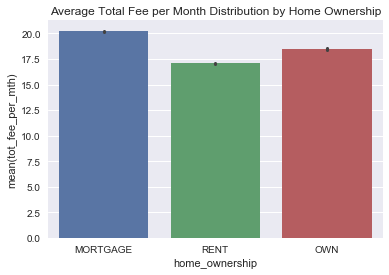

In [186]:
#plot average total fee per month by home ownership
home_list=['MORTGAGE','RENT','OWN']
df_home = df[df['home_ownership'].isin(home_list)]
ax = plt.axes()
sns.barplot(x='home_ownership', y='tot_fee_per_mth', data=df_home)
plt.title('Average Total Fee per Month Distribution by Home Ownership')
plt.show()

#### Borrower who has mortgage shows higher average total_fee_per_month compared to the others. Borrowers who rents the property is least profitable.

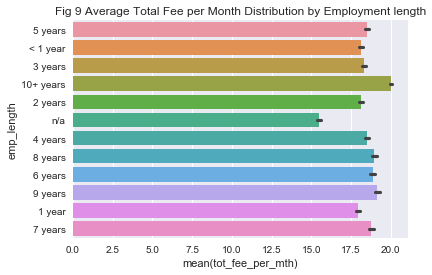

In [179]:
# plot Average total fee per month by employment length
ax = plt.axes()
sns.barplot(x='tot_fee_per_mth', y='emp_length', data=df)
plt.title('Average Total Fee per Month Distribution by Employment length')
plt.show()

#### employment length > 10 years shows the highest profit,  and the n/a shows the lowest. 

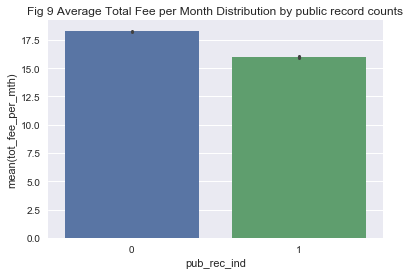

In [254]:
# plot average total fee per month by public record indicator
df['pub_rec_ind']=[0 if x==0 else 1 for x in df['pub_rec']]
ax = plt.axes()
sns.barplot(x='pub_rec_ind', y='tot_fee_per_mth', data=df)
plt.title('Average Total Fee per Month Distribution by public record counts')
plt.show()

#### Borrower with public record shows lower profit compared to borrower who does not.

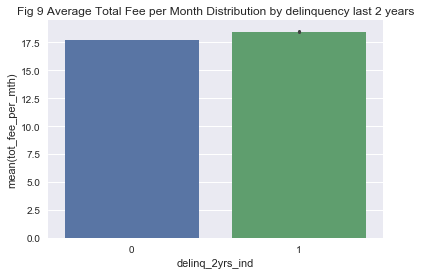

In [252]:
#plot average total fee per month with last 2year delinquency indicator
df['delinq_2yrs_ind']=[0 if x==0 else 1 for x in df['delinq_2yrs']]
ax = plt.axes()
sns.barplot(x='delinq_2yrs_ind', y='tot_fee_per_mth', data=df)
ax.set_title('Average Total Fee per Month Distribution by delinquency last 2 years')
plt.show()

#### Borrowers with last 2 year deliquency record is a little less profitable compared to the ones who don't have.

### 3. What typical characteristics of a good borrower looks like? What are the typical titles for them? How much money they make? What about bad borrowers? 


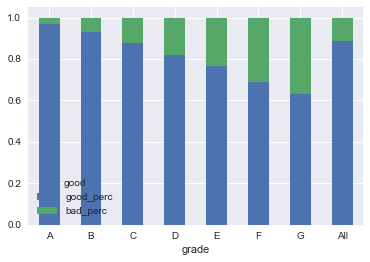

In [187]:
# This figure shows for each grade, the percentage of the good borrowers and bad borrowers
# good borrowers are denfined as the loan status in "Current" or "Fully Paid"
# all the others, such as late, default, charged-off, are defined as "Bad"
p=df.pivot_table(values='id',index=['grade'],columns='good',aggfunc='count', margins=True).reset_index()
p['good_perc']=p[1]/p['All']
p['bad_perc']=p[0]/p['All']
del p[0]
del p[1]
del p['All']
p.set_index(['grade'],inplace=True)
p.plot(kind='bar',stacked=True,rot=1)

#### For all the loan grades, good borrowers takes from ~60% - ~95% of loans. The lower grade the loan is, the higher the bad percentage is. 

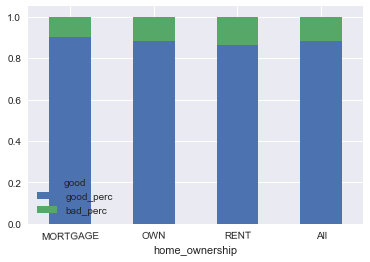

In [189]:
p=df_home.pivot_table(values='id',index=['home_ownership'],columns='good',aggfunc='count', margins=True).reset_index()
p['good_perc']=p[1]/p['All']
p['bad_perc']=p[0]/p['All']
del p[0]
del p[1]
del p['All']
p.set_index(['home_ownership'],inplace=True)
p.plot(kind='bar',stacked=True,rot=1)

#### Good borrowers could have mortgage, own or rent home ownership. However, the good borrower percentage is higher with mortgage compared to other home ownership. 

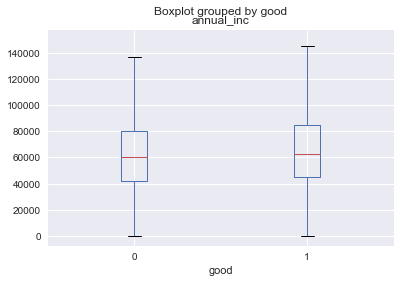

In [197]:
#1 means good borrower, 0 means bad borrower
#y axis is annual income
df[df['annual_inc']<150000].boxplot(column='annual_inc',by='good')

#### good borrower has a slighter higher income compared to bad borrower

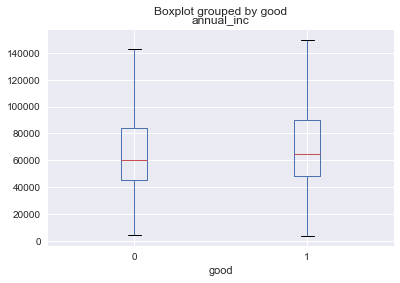

In [229]:
#plot good borrower and bad borrower income in CA and NY
df_stat = df[(df['addr_state'].str.lower()=='ca') | (df['addr_state'].str.lower()=='ny')]
df_stat[df_stat['annual_inc']<150000].boxplot(column='annual_inc',by='good')

#### Good borrowers in NY and CA, where living expense is relatively higher than the other states, are making more many than bad borrowers.

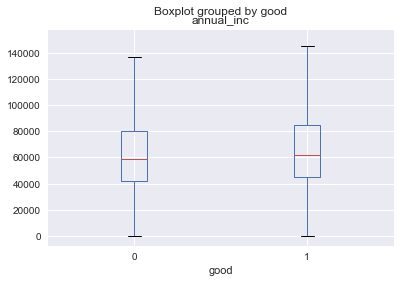

In [230]:
df_stat = df[(df['addr_state']<>'CA') & (df['addr_state']<>'NY')]
df_stat[df_stat['annual_inc']<150000].boxplot(column='annual_inc',by='good')

#### Other statse, the income difference between good and bad borrowers are not as significant.

In [211]:
df[df['good']==1].emp_title.str.lower().value_counts().head(10)

teacher             9041
manager             7896
owner               5328
registered nurse    4001
supervisor          3571
sales               3244
driver              3214
rn                  3158
office manager      2524
project manager     2462
Name: emp_title, dtype: int64

In [213]:
df[df['good']==0].emp_title.str.lower().value_counts().head(10)

manager             1062
teacher              915
owner                773
driver               649
sales                515
supervisor           509
registered nurse     442
rn                   387
truck driver         344
general manager      313
Name: emp_title, dtype: int64

#### Manager, teacher and owner are listed as top 3 for both good borrowers and bad borrowers. Office manager and project manger make to the top 10 in good borrower list but not on the top 10 bad borrower list.

In [241]:
df.id.describe()

count    4.210950e+05
mean     5.393097e+07
std      9.475423e+06
min      5.670500e+04
25%      4.612481e+07
50%      5.536031e+07
75%      6.186217e+07
max      6.861706e+07
Name: id, dtype: float64

In [266]:
####bad rate by state
n=df[df['good']==0].addr_state.str.upper().value_counts()
d=df.addr_state.str.upper().value_counts()
bad_rate_by_state = n/d
bad_rate_by_state.reset_index().sort(['addr_state'],ascending=False).head(10)


C:\Users\Chao Cheng\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,index,addr_state
39,SD,0.153293
1,AL,0.141762
31,NV,0.141121
34,OK,0.139617
2,AR,0.137690
16,LA,0.135347
23,MS,0.130737
0,AK,0.128931
32,NY,0.128590
30,NM,0.125479


#### Above shows the top 10 bad rate states. Bad borrowers geographically live in state with worse enconomy.

### 4. Do you observe any correlation in borrower’s data? Do you think for strong correlated variables, we can reduce the number of data points we collect? Why or why not?


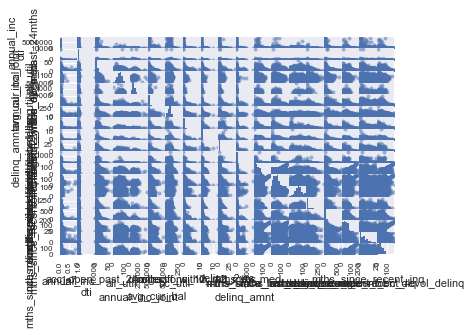

In [182]:
features = ['annual_inc',
            'dti',
            'acc_open_past_24mths',
            'all_util',
            'annual_inc_joint',
            'avg_cur_bal',
            'bc_util',
            'chargeoff_within_12_mths',
            'collections_12_mths_ex_med',
            'delinq_2yrs',
            'delinq_amnt',
            'earliest_cr_line',
            'mths_since_last_delinq',
            'mths_since_last_major_derog',
            'mths_since_last_record',
            'mths_since_rcnt_il',
            'mths_since_recent_bc',
            'mths_since_recent_bc_dlq',
            'mths_since_recent_inq',
            'mths_since_recent_revol_delinq'
            ]

scatter_matrix(df[features])
plt.show()

#### The above graph selectively shows the scatter matrix of some features. As we would see some of the features are highly correlated.

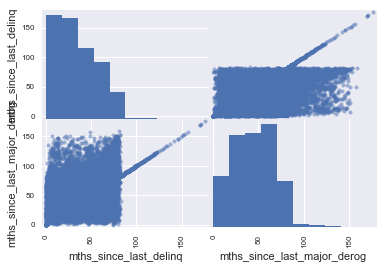

In [270]:
#mths_since_last_delinq:The number of months since the borrower's last delinquency.
#mths_since_last_major_derog:Months since most recent 90-day or worse rating
features=['mths_since_last_delinq',
          'mths_since_last_major_derog']
scatter_matrix(df[features])
plt.show()

In [268]:
df[features].corr()

,mths_since_last_delinq,mths_since_last_major_derog
mths_since_last_delinq,1.000000,0.681553
mths_since_last_major_derog,0.681553,1.000000


#### mths_since_last_delinq and mths_since_last_major_derog are somehow correlated, especially when both of the months are beyond ~ 75 months.

In [281]:
features=['revol_bal',
          'loan_amnt',
          'avg_cur_bal',
          'annual_inc',
          'num_actv_bc_tl',
          'open_acc',
          'tot_coll_amt',
          'num_sats']
df[features].corr()

,revol_bal,loan_amnt,avg_cur_bal,annual_inc,num_actv_bc_tl,open_acc,tot_coll_amt,num_sats
revol_bal,1.000000,0.334656,0.300571,0.270174,0.313037,0.222987,-0.030903,0.222149
loan_amnt,0.334656,1.000000,0.238156,0.305734,0.212990,0.188214,-0.021437,0.189328
avg_cur_bal,0.300571,0.238156,1.000000,0.293642,-0.110135,-0.115998,-0.005693,-0.115909
annual_inc,0.270174,0.305734,0.293642,1.000000,0.106892,0.122328,-0.000509,0.122114
num_actv_bc_tl,0.313037,0.212990,-0.110135,0.106892,1.000000,0.551822,-0.016128,0.550698
open_acc,0.222987,0.188214,-0.115998,0.122328,0.551822,1.000000,0.002337,0.998602
tot_coll_amt,-0.030903,-0.021437,-0.005693,-0.000509,-0.016128,0.002337,1.000000,0.002679
num_sats,0.222149,0.189328,-0.115909,0.122114,0.550698,0.998602,0.002679,1.000000


#### some more examples of correlation. 
#### The number of open credit lines in the borrower's credit file (open_acc)  is highly correlated with Number of satisfactory accounts (num_sats)

#### In my opinion, I still suggest we collect those variables even though some of the features are correlated. Because first of all, storing data is relatively cheap. Some variables such as fund_amnt and loan_amnt are identical in this dataset and may seem useless for this analysis. However, those data would be very valuable for answering the questions that what kind of loan would not be fully funded when we have both the loans fully funded and not fully funded. Storing these data provide the potential opportunity to answer more questions, as long as collecting the data does not require much more cost. Second, there are some data mining techniques such as random forest, which would deal with such highly correlated variables. By getting the subset of all the features may reveal some undiscovered information in highly correlated variables and increase the model performance. 

### 5. If maximizing profits is the only goal, do you think Lending Club does a good job in assigning grades to their loans? 


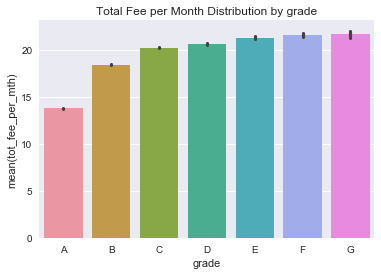

In [283]:
ax = plt.axes()
sns.barplot(x='grade', y='tot_fee_per_mth', data=df, order = ['A','B','C','D','E','F','G'])
ax.set_title('Total Fee per Month Distribution by grade')
plt.show()

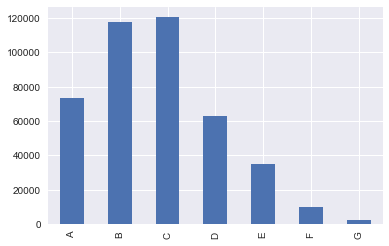

In [284]:
df.grade.value_counts().sort_index().plot(kind='bar')

#### From profitability stand point, Grade A is the least profitable. Grade B and C have much higher profit compared to Grade A. The difference between profit of Grade C and Grade G, which is highest profitable grade, is only around one dollar.  So that's why Lending Club assigns highest amount of loans to grade C and D.

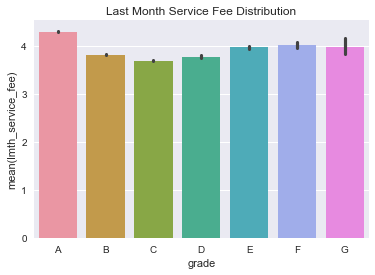

In [285]:
ax = plt.axes()
sns.barplot(x='grade', y='lmth_service_fee', data=df, order = ['A','B','C','D','E','F','G'])
ax.set_title('Last Month Service Fee Distribution')
plt.show()

In [293]:
#write to dataframe to a new csv file
df.to_csv(data_loc +'\\'+ 'LoanStats3d_new.csv')

#### Theoretically, by assigning all the loans to grade G provides the highest profit. However, Lending Club is a peer to peer lending platform. They need to attract investors and good borrowers to grow their business. The investor's earning is proportinal to the service fee. From the above, we could see the Grade A provides highest return on investment. Thus Lending Club assigns a good amount of loans with lower risk to the Grade A to attracts investor. Although this may mean lending club need to sacrifice on the profit of Grade A, it helps the health of the investor's portfolio. At the same time, with the lower interest and lower origination fee, borrower with financial resposibility may be attracted to the platform. Although Grade E, F and G are highly profitable, the difference compared with Grade C and D is not very significant. It is not wise to risk many investors' money too much. Overall, I think lending club did a good job on assigning the grades to their loans.

### 6. (Optional) Can you project the revenue of these loans over time?

#### Lending Club's revenue is based on the origination fee and service fee. Since all the loans in this dataset have been fully funded, all the origination fee has been collected from borrower. The service fee is 1% of the payment. Predicting if the loan would keep in good status (Current or Fully Paid)  would provide the answer to the revenue projection. If the loan is still good, then the revenue would be the 1% of payment, otherwise it would be zero.
#### The target variable for this model would be the "good" indicator, with 1 meaning the loan is current or fully paid, and 0 meaning the loan is late, default, or charged-off.

In [1]:
#import h2o
import h2o
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.25-b02, mixed mode)
  Starting server from C:\Users\Chao Cheng\Anaconda2\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: c:\users\chaoch~1\appdata\local\temp\tmpepzivp
  JVM stdout: c:\users\chaoch~1\appdata\local\temp\tmpepzivp\h2o_Chao_Cheng_started_from_python.out
  JVM stderr: c:\users\chaoch~1\appdata\local\temp\tmpepzivp\h2o_Chao_Cheng_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,09 secs
H2O cluster version:,3.10.4.6
H2O cluster version age:,17 days
H2O cluster name:,H2O_from_python_Chao_Cheng_lyqy7w
H2O cluster total nodes:,1
H2O cluster free memory:,1.740 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [2]:
#import h2o randomforest and grid search
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch


In [3]:
h2o.h2o.connect()

Connecting to H2O server at http://localhost:54321... successful.


H2O cluster uptime:,16 secs
H2O cluster version:,3.10.4.6
H2O cluster version age:,17 days
H2O cluster name:,H2O_from_python_Chao_Cheng_lyqy7w
H2O cluster total nodes:,1
H2O cluster free memory:,1.724 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


<H2OConnection to http://localhost:54321, session _sid_914a>

In [4]:
#read data
data_loc = 'D:\\blend'
model_df=h2o.import_file(data_loc +'\\'+ 'LoanStats3d_new.csv')
print model_df.dim
print model_df.head(5)

Parse progress: |█████████████████████████████████████████████████████████| 100%
[421095, 123]


C1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,month,term_n,orig_rate,orig_fee,orig_fee_per_mth,service_fee,good,lmth_service_fee,tot_fee_per_mth,Current_ind,income_level
0,6.86152e+07,7.35179e+07,16000,16000,16000,60 months,0.0849,328.19,B,B1,Supervisor,5 years,MORTGAGE,62000,Source Verified,2015-12-01 00:00:00,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68615169,,credit_card,Credit card refinancing,936xx,CA,28.92,0,2002-03-01 00:00:00,0,39,nan,10,0,15763,0.512,24,w,13083.4,13083.4,4247.6,4247.6,2916.65,1330.95,0,0,0,2017-02-01 00:00:00,328.19,2017-03-01 00:00:00,2017-02-01 00:00:00,0,61,1,INDIVIDUAL,nan,nan,,0,0,227708,3,3,1,2,3,48608,82,2,4,4727,71,30800,1,1,0,6,22771,8703,63,0,0,165,159,3,3,3,3,nan,17,39,1,4,5,4,7,9,6,12,6,10,0,0,0,3,87.5,50,0,0,307343,64371,23500,59526,12,60,5,800,13.3333,42.476,1,3.2819,16.6152,1,4
1,6.85376e+07,7.34274e+07,8000,8000,8000,36 months,0.1078,261.08,B,B4,Counselor,< 1 year,MORTGAGE,45000,Not Verified,2015-12-01 00:00:00,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68537564,,debt_consolidation,Debt consolidation,482xx,MI,21.23,0,1998-01-01 00:00:00,0,34,nan,28,0,11141,0.355,69,w,5403.18,5403.18,3382.06,3382.06,2596.82,785.24,0,0,0,2017-02-01 00:00:00,261.08,2017-03-01 00:00:00,2017-02-01 00:00:00,0,61,1,INDIVIDUAL,nan,nan,,0,0,148154,2,2,0,1,13,136887,86,4,6,1984,49,31400,2,2,0,7,5926,1188,79.5,0,0,147,215,4,4,2,13,nan,13,34,1,3,11,3,6,21,25,45,12,27,0,0,0,4,97.1,100,0,0,168819,148154,5800,136996,12,36,4,320,8.88889,33.8206,1,2.6108,11.4997,1,3
2,6.85368e+07,7.34266e+07,10000,10000,10000,36 months,0.1078,326.35,B,B4,Lpn,3 years,MORTGAGE,41600,Not Verified,2015-12-01 00:00:00,Current,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68536799,,debt_consolidation,Debt consolidation,472xx,IN,15.78,0,2004-10-01 00:00:00,0,nan,nan,18,0,12958,0.525,33,w,6753.97,6753.97,4227.58,4227.58,3246.03,981.55,0,0,0,2017-02-01 00:00:00,326.35,2017-03-01 00:00:00,2017-02-01 00:00:00,0,nan,1,INDIVIDUAL,nan,nan,,0,0,168304,2,9,2,3,2,27723,94,0,2,4958,75,24700,2,4,2,5,9350,4617,66.8,0,0,134,124,16,2,2,16,nan,7,nan,0,2,5,3,4,16,8,15,5,18,0,0,0,2,100,33.3,0,0,190694,40681,13900,29512,12,36,4,400,11.1111,42.2758,1,3.2635,14.3746,1,3
3,6.83551e+07,7.32449e+07,24700,24700,24700,36 months,0.1199,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000,Not Verified,2015-12-01 00:00:00,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,,small_busine

In [5]:
#define good as the target factor
model_df['good']=model_df['good'].asfactor()


In [6]:
#remove some columns not containing information for prediction (such as member_id),
#and some self fullfiling features such as loan_status
col_list=model_df.col_names
col_ignore=['id',
            'member_id',
            'term',
            'url',
            'desc',
            'zip_code',
            'initial_list_status',
            'C1',
            'loan_status',
            'lmth_service_fee',
            'Current_ind', 
            'recoveries',  
            'collection_recovery_fee',
            'last_pymnt_d'

            ]
features = [i for i in col_list if i not in col_ignore]

for i in features:
    if '_ind' in i:
        model_df[i]=model_df[i].asfactor()
    


In [7]:
model_df[features].describe()

Rows:421095
Cols:109




,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,month,term_n,orig_rate,orig_fee,orig_fee_per_mth,service_fee,good,tot_fee_per_mth,income_level
type,int,int,real,real,real,enum,enum,enum,enum,enum,real,enum,time,enum,enum,enum,enum,real,int,time,int,int,int,int,int,int,real,int,real,real,real,real,real,real,real,real,time,time,int,int,int,enum,real,real,enum,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,real,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,real,real,int,int,int,int,int,int,int,int,real,real,real,real,enum,real,int
mins,1000.0,1000.0,900.0,0.0532,14.01,,,,,,0.0,,1.4200704e+12,,,,,0.0,0.0,-8.205408e+11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4859072e+12,1.417392e+12,0.0,0.0,1.0,,17950.0,3.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500.0,0.0,0.0,0.0,1.0,36.0,1.11,11.1,0.308333333333,0.0,,0.431666666667,1.0
mean,15240.2858619,15240.2858619,15234.1564115,0.126003735262,441.859660148,,,,,,76965.6086626,,1.43565117784e+12,,,,,19.1959890761,0.34739666821,9.05666271814e+11,0.572690248044,34.0233911934,66.592609017,11.9486434178,0.233776226267,17685.4764816,0.538397205731,25.4934682198,6731.85224785,6728.95744431,9724.27295245,9720.60096696,7468.87766608,2193.4124438,0.573743407111,2771.67150305,1.48832565026e+12,1.48314795718e+12,0.0202400883411,45.1147406074,1.0,,109981.011585,18.3101178782,,0.00608651254468,257.478241252,140075.545245,1.10902114917,2.92883211679,0.761650758001,1.67457420925,20.9126862086,36552.8113887,71.5804909491,1.38906045293,2.97548193899,5887.97973985,60.8819951338,33657.7075862,0.943945349055,1.53705783268,2.23409133446,4.66499958442,13104.7847208,9636.06399173,62.2281362446,0.0104204514421,13.7651836284,127.56741863,186.586696589,13.4512473432,8.01320367138,1.68526104561,24.8565338356,39.8381767956,6.75116335897,35.7971424241,0.527054465144,3.74096581531,5.86083187879,4.79987888719,8.13713770052,8.64900081929,8.43178617652,14.8836008112,5.80923782044,11.8945368622,0.000761449740585,0.00404184328952,0.0943183842126,2.17094717344,93.924313041,47.5271096014,0.13318847291,0.0645555041024,173407.01024,52221.9894798,21958.2089576,43478.6456833,6.95538298959,43.8607630107,4.32495524763,667.836662784,14.901564863,97.2427295245,,18.7845007031,3.87425165343
maxs,35000.0,35000.0,35000.0,0.2899,1445.46,,,,,,9500000.0,,1.448928e+12,,,,,9999.0,39.

In [8]:
#split the data into train, validation1 and validation2.
#train and validation1 would be used as train and test for model training
#validation2 would be used as validation dataset as no out-of-time data sets are available. 
train, test = model_df[features].split_frame(
               ratios=[0.5],
               seed=100,
               destination_frames = ['train.hex', 'test.hex'])
print train.dim
print test.dim
validation1,validation2 = test.split_frame(
               ratios=[0.5],
               seed=100,
               destination_frames = ['validation1.hex', 'validation2.hex'])
print validation1.dim
print validation2.dim

[210809, 109]
[210286, 109]
[105163, 109]
[105123, 109]


In [9]:
response = "good"

In [10]:
#build model with 100 trees
rf=H2ORandomForestEstimator(
   model_id = 'v1',
   ntrees=100,
   seed=100)
rf.train(x=features, y=response, training_frame=train,
        validation_frame = validation1)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [11]:
print rf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  v1


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.0211796905314
RMSE: 0.145532438073
LogLoss: 0.0935705269754
Mean Per-Class Error: 0.0227389309954
AUC: 0.996154431279
Gini: 0.992308862559
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.781876869417: 


,0,1,Error,Rate
0,22627.0,1666.0,0.0686,(1666.0/24293.0)
1,919.0,185597.0,0.0049,(919.0/186516.0)
Total,23546.0,187263.0,0.0123,(2585.0/210809.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.7818769,0.9930841,176.0
max f2,0.7032895,0.9956508,199.0
max f0point5,0.8399906,0.9936531,155.0
max accuracy,0.7818769,0.9877377,176.0
max precision,0.9994496,1.0,0.0
max recall,0.4525126,1.0,262.0
max specificity,0.9994496,1.0,0.0
max absolute_mcc,0.7924330,0.9393074,173.0
max min_per_class_accuracy,0.8655624,0.9761660,144.0
max mean_per_class_accuracy,0.8571499,0.9772611,148.0


Gains/Lift Table: Avg response rate: 88.48 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100043,0.9980471,1.1302462,1.1302462,1.0,1.0,0.0113073,0.0113073,13.0246199,13.0246199
,2,0.0200039,0.9971528,1.1302462,1.1302462,1.0,1.0,0.0113020,0.0226093,13.0246199,13.0246199
,3,0.0300035,0.9964418,1.1302462,1.1302462,1.0,1.0,0.0113020,0.0339113,13.0246199,13.0246199
,4,0.0400030,0.9957579,1.1302462,1.1302462,1.0,1.0,0.0113020,0.0452133,13.0246199,13.0246199
,5,0.0500026,0.9950975,1.1302462,1.1302462,1.0,1.0,0.0113020,0.0565153,13.0246199,13.0246199
,6,0.1000005,0.9915539,1.1302462,1.1302462,1.0,1.0,0.0565099,0.1130252,13.0246199,13.0246199
,7,0.1500031,0.9881042,1.1302462,1.1302462,1.0,1.0,0.0565153,0.1695404,13.0246199,13.0246199
,8,0.2000009,0.9850881,1.1302462,1.1302462,1.0,1.0,0.0565099,0.2260503,13.0246199,13.0246199
,9,0.3000014,0.9791962,1.1302462,1.1302462,1.0,1.0,0.1130252,0.3390755,13.0246199,13.0246199
,10,0.4000019,0.9731667,1.1302462,1.1302462,1.0,1.0,0.1130252,0.4521006,13.0246199,13.0246199




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.0208463148483
RMSE: 0.144382529581
LogLoss: 0.0928526088803
Mean Per-Class Error: 0.0174338691781
AUC: 0.997642416875
Gini: 0.99528483375
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.790659872436: 


,0,1,Error,Rate
0,11490.0,654.0,0.0539,(654.0/12144.0)
1,438.0,92581.0,0.0047,(438.0/93019.0)
Total,11928.0,93235.0,0.0104,(1092.0/105163.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.7906599,0.9941370,176.0
max f2,0.7282231,0.9961605,196.0
max f0point5,0.8312361,0.9950249,161.0
max accuracy,0.7906599,0.9896161,176.0
max precision,0.9988519,1.0,0.0
max recall,0.5424370,1.0,251.0
max specificity,0.9988519,1.0,0.0
max absolute_mcc,0.7906599,0.9488224,176.0
max min_per_class_accuracy,0.8645369,0.9822079,147.0
max mean_per_class_accuracy,0.8581310,0.9825661,150.0


Gains/Lift Table: Avg response rate: 88.45 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100035,0.9977469,1.1305540,1.1305540,1.0,1.0,0.0113095,0.0113095,13.0553973,13.0553973
,2,0.0200070,0.9966125,1.1305540,1.1305540,1.0,1.0,0.0113095,0.0226190,13.0553973,13.0553973
,3,0.0300010,0.9956447,1.1294783,1.1301956,0.9990485,0.9996830,0.0112880,0.0339071,12.9478279,13.0195636
,4,0.0400046,0.9946350,1.1305540,1.1302852,1.0,0.9997623,0.0113095,0.0452166,13.0553973,13.0285241
,5,0.0500081,0.9935904,1.1294793,1.1301240,0.9990494,0.9996197,0.0112988,0.0565153,12.9479302,13.0124023
,6,0.1000067,0.9880604,1.1303390,1.1302315,0.9998098,0.9997147,0.0565153,0.1130307,13.0338957,13.0231480
,7,0.1500052,0.9841418,1.1305540,1.1303390,1.0,0.9998098,0.0565261,0.1695568,13.0553973,13.0338971
,8,0.2000038,0.9802387,1.1301239,1.1302852,0.9996196,0.9997623,0.0565046,0.2260613,13.0123941,13.0285216
,9,0.3000010,0.9728493,1.1300164,1.1301956,0.9995245,0.9996830,0.1129984,0.3390598,13.0016433,13.0195624
,10,0.3999981,0.9666775,1.1304465,1.1302583,0.9999049,0.9997385,0.1130414,0.4521012,13.0446465,13.0258333



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2017-05-14 20:17:52,0.333 sec,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2017-05-14 20:18:15,23.131 sec,13.0,0.1644548,0.1578923,0.9625781,1.1302462,0.0283208,0.1493767,0.0953524,0.9899625,1.1294793,0.0190086
,2017-05-14 20:19:27,1 min 35.938 sec,58.0,0.1469677,0.0938485,0.9933343,1.1302462,0.0151559,0.1445851,0.0921058,0.9970716,1.1305540,0.0116391
,2017-05-14 20:20:53,3 min 1.213 sec,100.0,0.1455324,0.0935705,0.9961544,1.1302462,0.0122623,0.1443825,0.0928526,0.9976424,1.1305540,0.0103839


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
total_rec_prncp,139622.4531250,1.0,0.1276491
last_pymnt_amnt,92141.8671875,0.6599359,0.0842402
out_prncp_inv,84115.1171875,0.6024469,0.0769018
next_pymnt_d,78315.7890625,0.5609111,0.0715998
out_prncp,77889.8828125,0.5578607,0.0712104
---,---,---,---
annual_inc_joint,94.8012543,0.0006790,0.0000867
verification_status_joint,67.2813797,0.0004819,0.0000615
delinq_amnt,58.8630867,0.0004216,0.0000538
application_type,26.6287155,0.0001907,0.0000243



See the whole table with table.as_data_frame()



In [12]:
#rank the variable importance for prediction
rf.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,total_rec_prncp,139622.453125,1.000000,0.127649
1,last_pymnt_amnt,92141.867188,0.659936,0.084240
2,out_prncp_inv,84115.117188,0.602447,0.076902
3,next_pymnt_d,78315.789062,0.560911,0.071600
4,out_prncp,77889.882812,0.557861,0.071210
5,tot_fee_per_mth,72328.851562,0.518032,0.066126
6,total_pymnt,50985.519531,0.365167,0.046613
7,total_pymnt_inv,44794.917969,0.320829,0.040954
8,service_fee,42231.429688,0.302469,0.038610
9,orig_fee_per_mth,35970.140625,0.257624,0.032886


In [13]:
rf_validation2_pred = rf.predict(validation2)

drf prediction progress: |████████████████████████████████████████████████| 100%


In [14]:
rf_validation2_pred.head(5)

predict,p0,p1
1,0.0576312,0.942369
1,0.00569459,0.994305
1,0.0311223,0.968878
0,0.895027,0.104973
1,0.0727608,0.927239


In [16]:

# Accuracy returns the accuracy for this binomial model.
rf.model_performance(validation2).accuracy()

[[0.8032641772880472, 0.9903731818916888]]

In [21]:
rf.model_performance(validation2).auc()

0.9975402147401694

In [17]:
hyper_parameters ={'ntrees':[10,50], 'max_depth':[20,10]}
grid_search = H2OGridSearch(H2ORandomForestEstimator, hyper_params=hyper_parameters)
grid_search.train(x=features,y=response, training_frame=train)
grid_search.show()

drf Grid Build progress: |████████████████████████████████████████████████| 100%
    max_depth ntrees  \
0          10     10   
1          20     10   

                                                  model_ids  \
0  Grid_DRF_train.hex_model_python_1494807395127_19_model_1   
1  Grid_DRF_train.hex_model_python_1494807395127_19_model_0   

               logloss  
0  0.16390560878273117  
1  0.23605381010370996  


#### Theoretically I should do the grid search smaller and bigger than the current hyperparameters  used in the previous model. However, a higher tree number makes my computer crash. So here I just provide some conceptual process for modeling. We could get the model performance with validation2 data set from the above grid search in H2O Flow UI: with AUC 0.982444, 0.944324, 0.995557, 0.914093.
#### Thus the first model has the best performance and we would like to choose that one.

In [249]:
df.delinq_2yrs.dtypes

dtype('int64')

In [244]:
df.pub_rec.value_counts()
df['pub_rec']=[ ]

0     346680
1      60215
2       9230
3       2876
4       1044
5        481
6        249
7        108
8         84
9         34
10        29
11        15
12        14
13        10
15         5
16         4
18         3
21         3
17         2
49         1
14         1
19         1
20         1
22         1
23         1
26         1
28         1
86         1
Name: pub_rec, dtype: int64

In [259]:
df.title.value_counts()

Debt consolidation                         249926
Credit card refinancing                    102056
Home improvement                            25264
Other                                       19179
Major purchase                               7434
Medical expenses                             3926
Car financing                                3475
Business                                     3357
Moving and relocation                        2422
Vacation                                     2246
Home buying                                  1440
Green loan                                    223
Simple Loan Until Contract Is Completed         1
odymeds                                         1
Prescription Drug and Medical Costs             1
SAVE                                            1
new kitchen for momma!                          1
new day                                         1
Pay off Lowes Card                              1
New Baby and New House (CC Consolidate)         1


KeyboardInterrupt: 

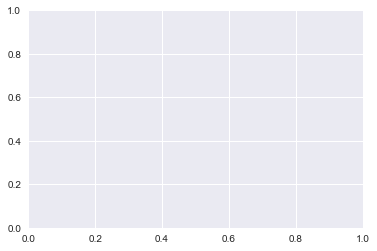

In [269]:
df_title = df[df['title'].isin(title_list)]
ax = plt.axes()
sns.barplot(x='tot_fee_per_mth', y='month', data=df_title)
plt.title('Fig 9 Average Total Fee per Month Distribution by month')
plt.show()

In [173]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [177]:
df.emp_length.value_counts()

10+ years    141521
2 years       37497
< 1 year      34340
3 years       33430
1 year        27473
5 years       24930
4 years       24506
n/a           23817
8 years       21560
7 years       18414
6 years       16838
9 years       16769
Name: emp_length, dtype: int64

In [267]:
df_title.title.value_counts()

Debt consolidation         249926
Credit card refinancing    102056
Home improvement            25264
Other                       19179
Major purchase               7434
Medical expenses             3926
Car financing                3475
Business                     3357
Moving and relocation        2422
Vacation                     2246
Home buying                  1440
Name: title, dtype: int64

In [255]:
df.dti.value_counts()

19.20      303
18.00      296
21.60      286
15.60      285
13.20      274
14.40      264
16.80      264
24.00      247
17.28      246
20.40      244
17.76      244
19.92      232
22.80      232
20.16      230
17.04      229
12.00      227
10.80      226
14.16      225
18.72      223
13.68      222
18.24      222
26.40      219
13.92      218
19.68      218
17.52      218
16.08      217
21.12      215
16.56      215
16.32      215
17.56      214
          ... 
43.68        1
64.99        1
0.01         1
55.06        1
45.78        1
89.83        1
72.30        1
125.25       1
47.06        1
44.40        1
44.52        1
1092.52      1
41.49        1
54.19        1
42.28        1
54.10        1
42.37        1
42.04        1
40.61        1
47.31        1
59.19        1
380.53       1
41.69        1
77.06        1
48.56        1
68.41        1
52.80        1
41.94        1
46.67        1
136.97       1
Name: dti, dtype: int64

In [242]:
df.home_ownership.value_counts()

MORTGAGE    207683
RENT        167644
OWN          45766
ANY              2
Name: home_ownership, dtype: int64

In [243]:
df.chargeoff_within_12_mths.value_counts()


0     417155
1       3628
2        237
3         46
4         14
5          7
6          4
7          2
10         1
9          1
Name: chargeoff_within_12_mths, dtype: int64

In [199]:
df['bad'] = [0 if x=='Current' or x=='Fully Paid' else 1 for x in df['loan_status']]

In [ ]:
ax = plt.axes()
sns.factorplot(x='grade', y='tot_fee_per_mth', data=df[df['issue_d']=='Oct-2014', col='term', kind='bar',
               order = ['A','B','C','D','E','F','G'])
ax.set_title('Fig 5 Total Fee per Month Distribution by Grade and Term')
plt.show()

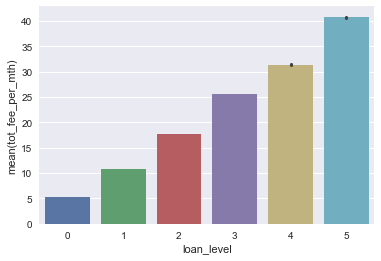

In [258]:
df['loan_level'] =[5 if x> 30000 else 4 if x>25000  else 3 if x>20000 else 2 if x> 15000  else 2 if x>10000 else 1 if x>5000  else 0 for x in df['loan_amnt']]
sns.barplot(x='loan_level', y='tot_fee_per_mth', data=df)
ax.set_title('Fig 11 Average Total Fee per Month Distribution by loan level')
plt.show()

In [137]:
df['orig_fee_per_month']=df['orig_fee']/df['term_n']

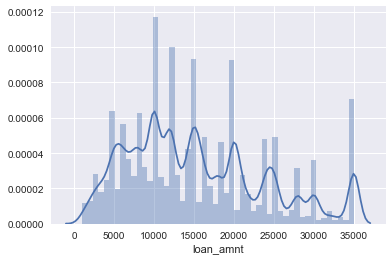

In [256]:
#take a look at the loan amount distribution
sns.distplot(df['loan_amnt'])

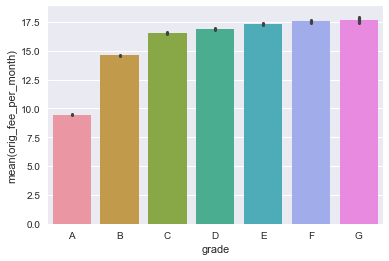

In [142]:
sns.barplot(x='grade', y='orig_fee_per_month', data=df, order = ['A','B','C','D','E','F','G'])

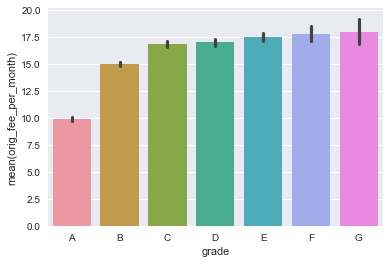

In [144]:
sns.barplot(x='grade', y='orig_fee_per_month', data=df[df['issue_d']=='Feb-2015'], order = ['A','B','C','D','E','F','G'])

In [ ]:
df['tot_fee_per_month']=df['orig_fee_per_month']+df['lmth_service_fee']

In [64]:
df[df.last_pymnt_amnt==0].loan_status.value_counts()


Charged Off    294
Name: loan_status, dtype: int64

In [18]:
len(df['url'].unique())

421095

In [16]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.210950e+05,4.210950e+05,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,421095.000000,421095.000000,421095.000000,217133.000000,74415.000000,421095.000000,421095.000000,4.210950e+05,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,122729.000000,421095.0,511.000000,509.000000,421095.000000,421095.000000,4.210950e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,4.210950e+05,21372.000000,21372.000000,21372.000000,421095.00000,421095.000000,417132.000000,416868.000000,421095.000000,421095.000000,408841.000000,421095.000000,421095.000000,421095.000000,421095.000000,417297.000000,108600.000000,376496.000000,151737.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,421094.000000,421095.000000,421095.000000,401865.000000,421095.000000,421095.000000,421095.000000,421095.000000,416856.000000,421095.000000,421095.000000,4.210950e+05,4.210950e+05,421095.000000,4.210950e+05
mean,5.393097e+07,5.759576e+07,15240.285862,15240.285862,15234.156412,441.859660,7.696561e+04,19.195989,0.347397,0.572690,34.023391,66.592609,11.948643,0.233776,1.768548e+04,25.493468,6731.852248,6728.957444,9724.272952,9720.600967,7468.877666,2193.412444,0.573743,61.409098,10.793400,2771.671503,0.020240,45.114741,1.0,109981.011585,18.310118,0.006087,257.478241,1.400755e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.580491,1.389060,2.975482,5887.979740,60.881995,3.365771e+04,0.943945,1.537058,2.234091,4.66500,13104.784721,9636.063992,62.228136,0.010420,13.765184,127.567419,186.586697,13.451247,8.013204,1.685261,24.856534,39.838177,6.751163,35.797142,0.527054,3.740966,5.860832,4.799879,8.137138,8.649001,8.431786,14.883601,5.809238,11.894537,0.000761,0.004042,0.094318,2.170947,93.924313,47.527110,0.133188,0.064556,1.734070e+05,5.222199e+04,21958.208958,4.347865e+04
std,9.475423e+06,1.013358e+07,8571.325901,8571.325901,8567.935752,244.850838,7.394996e+04,23.504038,0.927695,0.867776,21.990270,25.577899,5.633119,0.649778,2.419503e+04,12.097200,6975.864148,6972.541062,7161.590912,7159.162377,6523.441530,1900.836729,5.317043,461.711020,81.024136,5741.807514,0.157506,22.537808,0.0,52730.379847,7.169233,0.086482,2240.648162,1.552696e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.021964,1.520129,2.631886,5284.701239,20.013842,3.766404e+04,1.446872,2.723339,2.480242,3.19538,15671.803897,14774.166134,27.576378,0.117019,781.821107,52.075471,95.374931,17.156985,9.189312,1.990160,32.272793,23.003

In [19]:
print_full(df.dtypes)

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [25]:
pd.Series(df['loan_status']).value_counts()

Current               277527
Fully Paid             94968
Charged Off            33416
Late (31-120 days)      8626
In Grace Period         4674
Late (16-30 days)       1624
Default                  260
Name: loan_status, dtype: int64

In [43]:
df[(df['loan_status']=='Charged Off') & (df['collection_recovery_fee']<df['recoveries'])].count()

id                                12643
member_id                         12643
loan_amnt                         12643
funded_amnt                       12643
funded_amnt_inv                   12643
term                              12643
int_rate                          12643
installment                       12643
grade                             12643
sub_grade                         12643
emp_title                         11865
emp_length                        12643
home_ownership                    12643
annual_inc                        12643
verification_status               12643
issue_d                           12643
loan_status                       12643
pymnt_plan                        12643
url                               12643
desc                                  0
purpose                           12643
title                             12641
zip_code                          12643
addr_state                        12643
dti                               12643


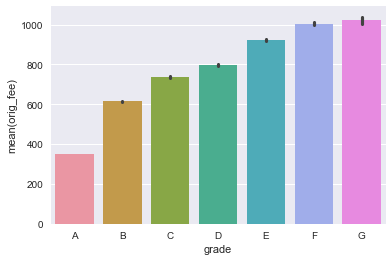

In [141]:
sns.barplot(x='grade', y='orig_fee', data=df, order = ['A','B','C','D','E','F','G'])

In [4]:
pd.Series(df['issue_d']).value_counts()

Oct-2015    48631
Jul-2015    45962
Dec-2015    44343
Nov-2015    37530
Aug-2015    35886
Apr-2015    35427
Jan-2015    35107
May-2015    31913
Sep-2015    28641
Jun-2015    28485
Mar-2015    25400
Feb-2015    23770
Name: issue_d, dtype: int64

In [7]:
df[df['member_id']==73517949]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68615169,73517949,16000,16000,16000.0,60 months,8.49%,328.19,B,B1,Supervisor,5 years,MORTGAGE,62000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,936xx,CA,28.92,0,Mar-2002,0,39.0,NaN,10,0,15763,51.2%,24,w,13083.35,13083.35,4247.6,4247.6,2916.65,1330.95,0.0,0.0,0.0,Feb-2017,328.19,Mar-2017,Feb-2017,0,61.0,1,INDIVIDUAL,NaN,NaN,NaN,0,0,227708,3.0,3.0,1.0,2.0,3.0,48608.0,82.0,2.0,4.0,4727.0,71.0,30800,1.0,1.0,0.0,6,22771,8703.0,63.0,0,0,165.0,159,3,3,3,3.0,NaN,17.0,39.0,1,4,5,4,7,9,6,12.0,6,10,0.0,0,0,3,87.5,50.0,0,0,307343,64371,23500,59526


In [14]:
df_test = pd.read_csv(data_loc +'\\'+ 'LoanStats_2017Q1.csv')

C:\Users\Chao Cheng\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
df_test.shape

(96782, 1)

In [17]:
df_test.head()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title                 emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose        title          zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_il_6m open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_il_6m sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med                sec_app_mths_since_last_major_derog                              
NaN NaN       3600      3600        3600             36 months   7.49%  111.97      A     A4        Code/Compliance Inspector 10+ years  MORTGAGE       120000     Not Verified        Mar-2017 Issued      n          NaN NaN  other          Other          467xx    IN         18.9  0           Aug-1992         1              NaN                    96                     18       1       5658      14.9%      33        w                   3600.00   3600.00       0.0         0.00            0.00            0.00          0.0                0.0        0.0                     NaN          0.0             Apr-2017     Apr-2017           0                          NaN                         1           INDIVIDUAL       NaN              NaN       NaN                       0              0            36506       2           6          2           6           2                  30848        55      4           7           1020       39       37900            3      1           4            13                   2147        7980           11.3    0                        0           166                295                  3                     2              0        9                    NaN                      2                     NaN                            0                     1              4               2           3         17        12            16            4                   18       0                0            0                  6                  100            0                1                    0         93599           36506             9000           55699                      NaN             NaN                      NaN                    NaN              NaN              NaN                NaN                NaN                   NaN                              NaN                                                                               NaN                              
              15000     15000       15000            60 months  14.